In [1]:
# imports, add to this as needed

# change to matplotlib notebook for classic view
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy.optimize import minimize
import json
from simanneal import Annealer

***Note:  this is a new version of HW5 that we wrote in Summer 2020 (added a few hints and fixes on 10/7/20).  Please fire away with questions on Piazza as we know the first draft of anything often needs clarification!***

# **HW5.1** - The Traveling Salesman Problem

In Lesson 4 we saw how to use local search to seek solutions to the TSP problem with 48 cities.  In this homework problem you'll use the `simanneal` package and the genetic algorithm to search for solutions.  The json file Caps48.json in the data folder has both the distance matrix and the optimal tour.  Your goal is to identify tours with total distance under 19,000 kilometers with each algorithm.

The following cell shows you how to visualize a tour of the 48 cities (and reminds you how to use the json file).  You should plot your solutions to see if they seem reasonable.  A good solution will avoid long detours and shouldn't intersect itself.  We plot the best possible solution here:

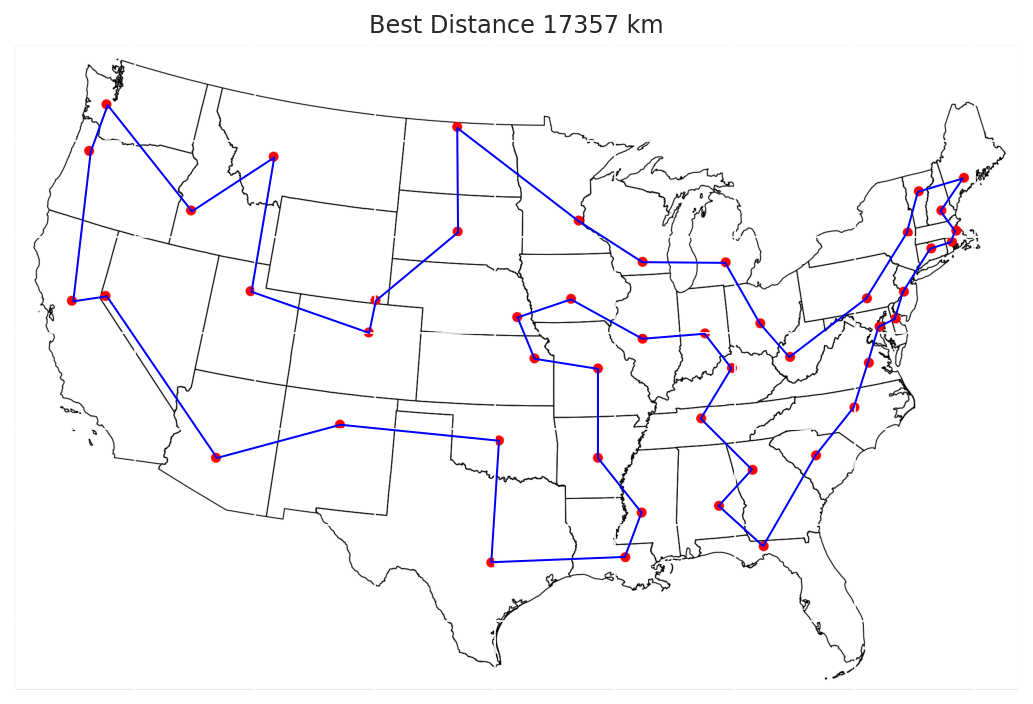

In [2]:
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]
optimal_tour = tsp["OptTour"]
opt_dist = tsp["OptDistance"]/1000 # converted to kilometers
xy = np.array(tsp["Coordinates"])

def plot_tour(best_tour, xy_meters, best_dist, height, width):

    meters_to_pxl = 0.0004374627441064968
    intercept_x = 2.464
    intercept_y = 1342.546
    xy_pixels = np.zeros(xy_meters.shape)
    xy_pixels[:,0] = meters_to_pxl * xy_meters[:,0] + intercept_x
    xy_pixels[:,1] = -meters_to_pxl * xy_meters[:,1] + intercept_y

    fig, ax = plt.subplots(1, 1, figsize=(height, width))
    im = plt.imread('images/caps48.png')
    implot = ax.imshow(im)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)

    loop_tour = np.append(best_tour, best_tour[0])
    ax.plot(xy_pixels[loop_tour, 0],
            xy_pixels[loop_tour, 1],
            c='b',
            linewidth=1,
            linestyle='-')
    plt.title('Best Distance {:d} km'.format(int(best_dist)))

# this is an example of how to plot a tour
plot_tour(optimal_tour, xy, opt_dist, 9, 6)

**HW5.1a** -

There isn't much to this part.  Adapt the code in the lesson to use the `simanneal` package to find a tour with total distance less than 19,000 km.  Plot your tour.  You may have to experiment with the temperature schedule to achieve a good result.  Without hacking the `simanneal` code it's impossible to set a random number seed to make reproducible results so just give this a good try.  You can tell us about your best solution even if it isn't the latest solution you found.  A plot isn't required, but it is useful for inspecting the tour to see if it is at least sensible.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  5800.00000   17645296.00     0.40%     0.00%     0:00:03    -1:59:5901 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  5800.00000   17922857.00     0.23%     0.02%     0:00:30     0:00:0087

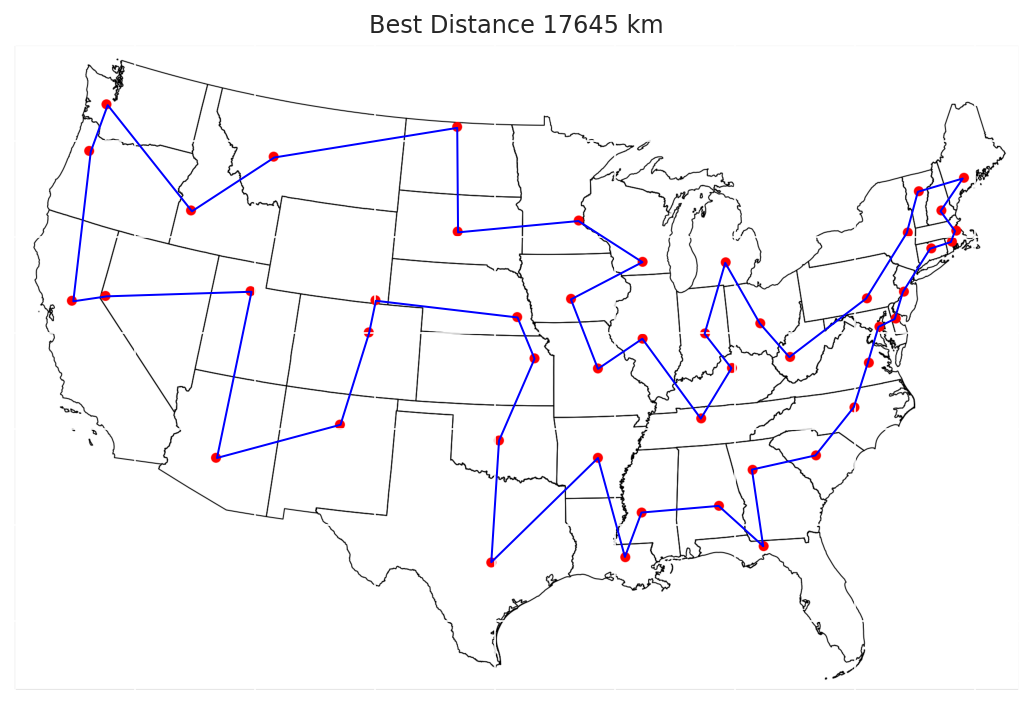

In [3]:
def tour_distance(tour, dist_mat):
    distance = dist_mat[tour[-1]][tour[0]]
    for gene1, gene2 in zip(tour[0:-1], tour[1:]):
        distance += dist_mat[gene1][gene2]
    return distance

def sub_tour_reversal(tour):
    # reverse a random tour segment
    num_cities = len(tour)
    i, j = np.sort(np.random.choice(num_cities, 2, replace=False))
    return np.concatenate((tour[0:i], tour[j:-num_cities + i - 1:-1],
                              tour[j + 1:num_cities]))

class TravellingSalesmanProblem(Annealer):

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        self.state = sub_tour_reversal(self.state)

    def energy(self):
        return tour_distance(self.state, self.distance_matrix)

# load data (this may have to be adapted for different problems)
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]
xy = np.array(tsp["Coordinates"])
init_tour = np.random.permutation(np.arange(len(distance_matrix))).astype(int).tolist()

tsp = TravellingSalesmanProblem(init_tour, distance_matrix)
tsp.set_schedule(tsp.auto(minutes=.5)) #set approximate time to find results

best_tour, best_dist = tsp.anneal()

plot_tour(best_tour, xy, best_dist/1000, 9, 6)

<font color="green">
 
Best Overall: 17383.61 km (minutes set to 0.2)


</font>

**HW5.1b** -

Use the Genetic Algorithm described in the text to find a tour with total distance less than 19,000 km.

* Initialize the population with permuations
* Implement the Ordered Crossover operator described in the lesson.
* Implement the Shuffling Indices (random city swaps) described in the lesson.
* Experiment with the algorithm parameters to find a good tour.  Add a line at the top to make the results reproducible: `np.random.seed(123)`.  You can change the seed to get different results, but the same seed with the same parameters should produce the same tour.
* Feel free to discuss parameter choices with other students on Piazza.
* Include a plot of your tour.
* To get you started we've copied the GA code from the lesson and added ###### before and after places you'll need to make changes.

<font color = "blue"> *** 10 points -  answer in cell below *** (don't delete this cell) </font>

Iteration |  Best this iter | Best ever
---------------------------------------------
      250 |     19510.40    |   19510.40
      500 |     19099.18    |   19099.18
      750 |     19099.18    |   19099.18
     1000 |     19099.18    |   19099.18
     1250 |     19099.18    |   18972.28
     1500 |     19099.18    |   18972.28
     1750 |     18838.09    |   18838.09
     2000 |     18838.09    |   18838.09




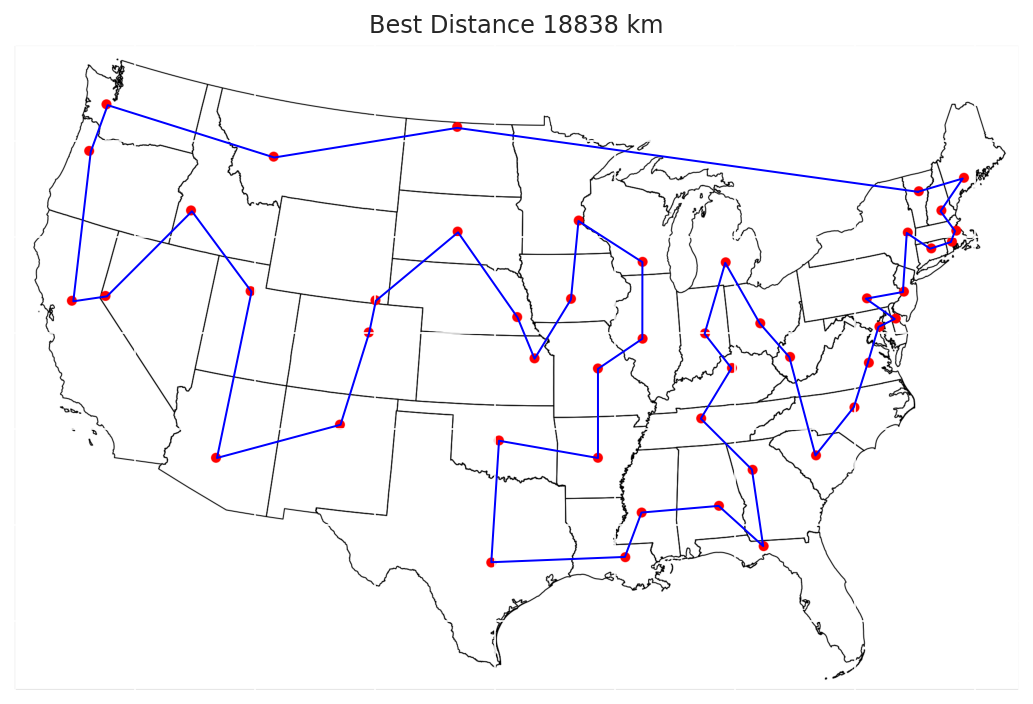

In [4]:


# load data (this may have to be adapted for different problems)
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]
xy = np.array(tsp["Coordinates"])

######
pop_size = 1000 # should be even due to the way we'll implement crossover
ind_size = 48
######
# parameters
tourn_size = 3 # tournament size for selection
cx_prob = 0.9 # probability a pair of parents crossover to produce two children
mut_prob = 0.1 # probability an individual mutates
ind_prob = 0.1 # probability each variable in an individual mutates

###### maybe here
num_iter = 2000 # number of genetic algorithm mutations
update_iter = 250 # how often to display output
######

stats = np.zeros((num_iter+1,3)) # for collecting statistics

######
# objective or fitness function
def tour_distance(tour, dist_mat):
    distance = dist_mat[tour[-1]][tour[0]]
    for gene1, gene2 in zip(tour[0:-1], tour[1:]):
        distance += dist_mat[gene1][gene2]
    return distance
######

###### may need to also enforce that the variables are integers and not floats
#initialize population and fitness np.random.randint(0,2,size=20,dtype=bool)
pop = np.zeros(shape=(ind_size,pop_size),dtype=int)
for j in range(pop_size):
    pop[:,j] = np.random.permutation(ind_size)
fitness = np.zeros(pop_size)
for j in range(pop_size):
    fitness[j] = tour_distance(pop[:,j], distance_matrix)    

# initialize stats and output
best_fitness = min(fitness)
stats[0,:] = np.array([0,best_fitness, best_fitness])
print('Iteration |  Best this iter | Best ever')
print('---------------------------------------------')

# def mutate(gene):
#     ind = range(len(gene))
#     g1, g2 = random.sample(ind, 2)
#     gene[g1], gene[g2] = gene[g2], gene[g1]
#     return gene

for iter in range(num_iter):
    # tournament selection
    sorted_pos = fitness.argsort() # sort pop by increasing fitness
    fitness = fitness[sorted_pos]
    pop = pop[:,sorted_pos]
    select_pop = np.zeros((ind_size,pop_size)) # initialize selected population
    for j in range(pop_size):
        subset_pos = np.random.choice(pop_size,tourn_size,replace=False) # select without replacement
        smallest_pos = np.min(subset_pos) # choose index corresponding to lowest fitness
        select_pop[:,j] = pop[:,smallest_pos]
        
    # one-point crossover (mating)
    cx_pop = np.zeros((ind_size,pop_size), dtype=int) # initialize crossover population
    for j in range(int(pop_size/2)):  # pop_size must be even
        #######
        parent1, parent2 = select_pop[:,2*j], select_pop[:,2*j+1]
        if np.random.uniform() < cx_prob: # crossover occurs
            swap_idx = np.sort(np.random.randint(0,ind_size,2))
            child1,child2 = parent2.copy(), parent1.copy()

            hole = np.full( ind_size, False, dtype = bool)
            hole[swap_idx[0]:swap_idx[1]+1] = True

            child1[~hole] = np.array([x for x in parent1 if x not in parent2[hole]])
            child2[~hole] = np.array([x for x in parent2 if x not in parent1[hole]])
        
        cx_pop[:,2*j] = child1
        cx_pop[:,2*j+1] = child2
        ######
        
    # gaussian mutation (rewritten to remove nested loop for speed)
    mut_pop = np.zeros((ind_size,pop_size), dtype=int) # initialize mutation population
   
   
    for j in range(pop_size):
        individual = cx_pop[:,j].copy() # copy is necessary to avoid conflicts in memory
        if np.random.uniform()<mut_prob:
            ###### 
                for k in individual:
                    if np.random.uniform() < ind_prob:
                        i = random.randint(0,len(individual)-1)
                        individual[k], individual[i] = individual[i], individual[k]
            ######
        mut_pop[:,j] = individual.copy() # copy is necessary to avoid conflicts in memory

    # fitness evaluation with local search
    pop = mut_pop.copy()
    for j in range(pop_size):
        ######
        fitness[j] = tour_distance(pop[:,j], distance_matrix)
        ######

    # collect stats and output to screen
    min_fitness = min(fitness) # best for this iteration
    if min_fitness < best_fitness: # best for all iterations
        best_fitness = min_fitness
        index = np.argmin(fitness)
        best_x = pop[:,index]

    stats[iter+1,:] = np.array([iter+1,min_fitness, best_fitness])
    if (iter+1) % update_iter == 0:
        print(f"{stats[iter+1,0]:9.0f} |     {stats[iter+1,1]/1000:0.2f}    |   {stats[iter+1,2]/1000:0.2f}")

######
#print(f"\nThe minimum value found of the TSP function is {best_fitness/1000:0.2f}")
print("\n")
######
plot_tour(best_x, xy, best_fitness/1000, 9, 6)

# **HW5.2** - The Knapsack Problem

We first encountered this problem in the Lesson 4 Homework.

The knapsack problem is a classical combinatorial optimization problem that will be good for practicing with the ideas of discrete local search and multistart.  Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.  In the 0-1 version of the knapsack problem, the decision variables are binary (or boolean) and represent whether or not to include each item in the collection.  We'll start with 20 items and you need to determine the collection of items that maximizes the value and keeps the total weight no more than 50 (that is $\leq 50$).

In [5]:
# generate random weights and values for a knapsack problem
# DO NOT CHANGE ANYTHING in this block of code
import numpy as np
num_items = 20
np.random.seed(seed=123) 
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50
np.random.seed() # use system clock to reset the seed so future random numbers will appear random

Use the `simanneal` package to apply simulated annealing to finding a good solution to this knapsack problem.  Remember that the knapsack problem is a maximization problem so you'll have to work with the appropriate negate

For this problem we have the constraint that total weight $\leq 50$ and we'll take two different approaches to ensuring our solutions satisfy the constraint.  (The two constraint approaches are also discussed in the supplemental notebooks in the extras folder.  Note that we are no longer using the DEAP package for the genetic algorithm that is mentioned in the supplements.)

**NOTE:**  The optimal backpack has total value 435 and total weight 50.  All of the algorithms below should be able to easily find this solution.

**HW5.2a** - The first approach is called a **hard constraint** wherein we reject all possible solutions that don't satisfy the constraint.  You'll implement this in the move() method.  
* copy `self.state` with `new_state = self.state.copy()`
* make a move on `new_state` (toggle a random item like in HW 4)
* if the total weight of `new_state` is $\leq 50$ then `set self.state = new_state`
* else don't change `self.state`.

Find a "good" solution to the knapsack problem by using `simanneal` with a hard constraint.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [6]:
class KnapsackProblemHard(Annealer):

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, values, weights, max_weight):
        self.values = values
        self.weights = weights
        self.max_weight = max_weight
        super(KnapsackProblemHard, self).__init__(state)  # important!

    def move(self):
        new_state = self.state.copy() # important to make copy
        # finishing making new_state by flipping a bit
        
        bit_to_flip = np.random.randint(0,num_items)
        new_state[bit_to_flip] = not new_state[bit_to_flip]
        if sum(self.weights[new_state]) <= self.max_weight:
            self.state = new_state
        # DO NOT add code to compare to previous values or anything else
            
    def energy(self):
        # return NEGATIVE total value of items in knapsack
        tot_value = sum(self.values[self.state])
               
        return -tot_value
        
# create initial knapsack
init_bag = np.zeros(num_items, dtype=bool)
# create instance of class
ks = KnapsackProblemHard(init_bag, values, weights, 50)

# call the annealer
ks.set_schedule(ks.auto(minutes=.2)) #set approximate time to find results

best_bag, best_value = ks.anneal()

print(best_bag, -best_value)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     1.10000       -425.00    35.35%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     1.10000       -430.00    34.49%     0.02%     0:00:11     0:00:00

[ True False  True  True False False  True  True  True  True False  True
  True False  True False  True  True  True False] 435


**HW5.2b** - The second approach is called a **soft constraint** because its possible to find a solution that doesn't satisfy the constraint.  Soft constraints are implemented by including a penalty in the objective function when the proposed solution doesn't satisfy the constraint.  To do this you'll modify the function called by the energy() method:
```
def knapsack_value_penalty(x, values, weights, max_tot_weight):
    # x is a vector of booleans of which items to include
    tot_value = sum(values[x])
    penalty = sum(values)*min( max_tot_weight - sum(weights[x]), 0) 
    return tot_value+penalty
```
The penalty here is negative when the total weight is too large so that the optimizer knows it hasn't found a good maximizing solution.

Find a "good" solution to the knapsack problem by using simanneal with a soft constraint.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [7]:
def knapsack_value_penalty(x, values, weights, max_tot_weight):
    # x is a vector of booleans of which items to include
    tot_value = sum(values[x])
    penalty = sum(values)*min( max_tot_weight - sum(weights[x]), 0) 
    return tot_value+penalty

class KnapsackProblemSoft(Annealer):

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, values, weights, max_weight):
        self.values = values
        self.weights = weights
        self.max_weight = max_weight
        super(KnapsackProblem, self).__init__(state)  # important!

    def move(self):
        # flip a bit in self.state, doesn't matter if it is now over weight or more or less valuable than before
        bit_to_flip = np.random.randint(0,num_items)
        new_state[bit_to_flip] = not new_state[bit_to_flip]
        self.state = new_state
        
    def energy(self):
        # return NEGATIVE total weight with penalty
        return -knapsack_value_penatly(self.state, self.values, self.weights, self.max_weight)
        
# create initial knapsack
init_bag = np.zeros(num_items, dtype=bool)
# create instance of class
ks = KnapsackProblemHard(init_bag, values, weights, 50)

# call the annealer
ks.set_schedule(ks.auto(minutes=.2)) #set approximate time to find results

best_bag, best_value = ks.anneal()

print(best_bag, -best_value)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.87000       -430.00    35.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.87000       -435.00    37.57%     0.00%     0:00:14     0:00:00

[ True False  True  True False False  True  True  True  True False  True
  True False  True False  True  True  True False] 435


**HW5.2c** - Use the soft constraint approach to solve the knapsack problem with the genetic algorithm (use the negated, penalized objective function).  Use OnePoint Crossover for mating.  Mutation should be toggling (flipping) each variable with probability `ind_prob`. Use tournament selection.  Include your solution in the cell below.

<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

In [10]:
######
pop_size = 500 # should be even due to the way we'll implement crossover
ind_size = 20
######
# parameters
tourn_size = 3 # tournament size for selection
cx_prob = 0.9 # probability a pair of parents crossover to produce two children
mut_prob = 0.1 # probability an individual mutates
ind_prob = 0.05 # probability each variable in an individual mutates
max_weight = 50
###### maybe here
num_iter = 20 # number of genetic algorithm mutations
update_iter = 5 # how often to display output
######

stats = np.zeros((num_iter+1,3)) # for collecting statistics

######
# objective or fitness function
def knapsack_value_penalty(x, values, weights, max_tot_weight):
    # x is a vector of booleans of which items to include
    tot_value = sum(values[x])
    penalty = sum(values)*min( max_tot_weight - sum(weights[x]), 0) 
    return -(tot_value+penalty)
######

###### may need to also enforce that the variables are integers and not floats
#initialize population and fitness np.random.randint(0,2,size=20,dtype=bool)
pop = np.zeros(shape=(ind_size,pop_size),dtype=bool)
for j in range(pop_size):
    pop[:,j] = np.random.permutation(ind_size)
fitness = np.zeros(pop_size)
for j in range(pop_size):
    fitness[j] = knapsack_value_penalty(pop[:,j], values, weights, max_weight)    

# initialize stats and output
best_fitness = min(fitness)
stats[0,:] = np.array([0,best_fitness, best_fitness])
print('Iteration |  Best this iter | Best ever')
print('---------------------------------------------')

for iter in range(num_iter):
    # tournament selection
    sorted_pos = fitness.argsort() # sort pop by increasing fitness
    fitness = fitness[sorted_pos]
    pop = pop[:,sorted_pos]
    select_pop = np.zeros((ind_size,pop_size)) # initialize selected population
    for j in range(pop_size):
        subset_pos = np.random.choice(pop_size,tourn_size,replace=False) # select without replacement
        smallest_pos = np.min(subset_pos) # choose index corresponding to lowest fitness
        select_pop[:,j] = pop[:,smallest_pos]
        
    # one-point crossover (mating)
    cx_pop = np.zeros((ind_size,pop_size), dtype=bool) # initialize crossover population
    for j in range(int(pop_size/2)):  # pop_size must be even
        parent1, parent2 = select_pop[:,2*j], select_pop[:,2*j+1]
        child1, child2 = parent1.copy(), parent2.copy()
        if np.random.uniform() < cx_prob: # crossover occurs
            cx_point = np.random.randint(1,ind_size) # crossover point between 0 and ind_size-2
            child1[0:cx_point], child2[0:cx_point] = parent2[0:cx_point], parent1[0:cx_point]
        cx_pop[:,2*j] = child1
        cx_pop[:,2*j+1] = child2
        ######
        
    # gaussian mutation (rewritten to remove nested loop for speed)
    mut_pop = np.zeros((ind_size,pop_size), dtype=bool) # initialize mutation population
   
   
    for j in range(pop_size):
        individual = cx_pop[:,j].copy() # copy is necessary to avoid conflicts in memory
        if np.random.uniform()<mut_prob:
            ###### 
                for k in individual:
                    if np.random.uniform() < ind_prob:
                        bit_to_flip = np.random.randint(num_items)
                        individual[bit_to_flip] = not individual[bit_to_flip]
                        
            ######
        mut_pop[:,j] = individual.copy() # copy is necessary to avoid conflicts in memory

    # fitness evaluation with local search
    pop = mut_pop.copy()
    for j in range(pop_size):
        ######
        fitness[j] = knapsack_value_penalty(pop[:,j], values, weights, max_weight)
        ######

    # collect stats and output to screen
    min_fitness = min(fitness) # best for this iteration
    if min_fitness < best_fitness: # best for all iterations
        best_fitness = min_fitness
        index = np.argmin(fitness)
        best_x = pop[:,index]

    stats[iter+1,:] = np.array([iter+1,-min_fitness, -best_fitness])
    if (iter+1) % update_iter == 0:
        print(f"\t{stats[iter+1,0]:2.0f} |     {stats[iter+1,1]:2.0f}   |   {stats[iter+1,2]:.0f}")

######
print(f"\nThe best total value found is: {-best_fitness}")
print("\n")
######


# initalize pop to be knapsacks (booleans)
# make sure cx_pop, mut_pop, etc. are initialized as booleans



Iteration |  Best this iter | Best ever
---------------------------------------------
	 5 |     379   |   379
	10 |     435   |   435
	15 |     435   |   435
	20 |     435   |   435

The best total value found is: 435.0




**HW5.2d** - Which of the three algorithms above seems to work the best.  Do you think you've found the knapsack with highest possible value (the global max)?  Why or why not?

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
All three methods returned the known true global optimum. The annealing methods are much simpler to deploy than the genetic algorithm, since we're using a package. The time required to run each annealing method them seemed similar enough. The genetic algorithm actually got to the answer more quickly.  The soft constraint method would require less thought when constructing. If pressed, I would say the soft-constraint annealing method was the most intuitive and easiest to deploy.
</font>

# **HW5.3** - The 10-dimensional Rastrigin Function with Local Search

The Rastrigin function was first explored in Lesson 4 and was also used in the Genetic Algorithm example in Lesson 5.  Here is the definition of the function:

In [11]:
# rastrigin definition
def rastrigin(x):
    x = np.array(x) # force a numpy arrray here so that the math below works
    # pass a single vector of length n (=dim) to evaluate Rastrigin
    return sum(x**2 + 10 - 10 * np.cos(2 * np.pi * x))

This function can be applied to an `x` that is any iterable of any length.  We'll be working with numpy arrays.  For the 10 dimensional problems your numpy array should be a vector with 10 floating point numbers.  We'll enforce bounds that $-5.12 \leq x_i \leq 5.12$ so all of the entries in $x$ should be between those bounds.  Your goal is find the global minimizer at (0,0,0,...) where the function value is also zero.

**HW5.3a** - Use the `simanneal` package.  The self-assessment solutions should be helpful here. This solution does not involve local search.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [12]:
def gauss_move(x,sigma):
    # sigma is the standard deviation for the normal distribution
    dim = 10
    return x + np.random.normal(loc = 0, scale = sigma, size=dim)

def clip_to_bounds(x,low,high):
    # low is the lower bound for clipping variables
    # high is the upper bound for clipping variables
    return np.array( [min(high,max(low,v)) for v in x])

class Rastrigin(Annealer):
    def __init__(self,state,lower,upper,sigma):
        self.lower = lower
        self.upper = upper
        self.sigma = sigma
        #repeat as needed
        super(Rastrigin,self).__init__(state)
    
    def move(self):
        # make random changes to self.state by using gauss_move (see self-assessment problems / lesson )
        # make sure self_state is in bounds
        self.state = gauss_move(self.state, self.sigma)
        self.state = clip_to_bounds(self.state, self.lower, self.upper)
        
    def energy(self):
        # return value of rastrigin function
        return rastrigin(self.state)
    

init_state = np.random.uniform(low=-1, high=1, size=10)
low = -5.12
high = 5.12
sigma = (high-low)/6
# create instance of class
rast = Rastrigin(init_state, low, high, sigma)

# call the annealer
rast.set_schedule(rast.auto(minutes=.2)) #set approximate time to find results

best_x, best_result = rast.anneal()

print(best_x, best_result)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.50000         57.87     0.05%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.50000         62.33     0.30%     0.13%     0:00:12     0:00:00

[ 0.82155801  1.09004131 -0.81110389 -0.15323284 -0.04897078 -0.77338556
  0.02793339  0.80895588  0.06438057  1.79811725] 48.16023088290734


**HW5.3b** - Now include local search in your `simanneal` solution.  To do this you'll need to modify the move() method. After you've add the random change and clipped to bounds, then start a local search from the current self.state using scipy.optimize.minimize (include the bounds) and set self.state to the resulting location found by the local search.  You can tell the minimize function to optimize self.energy starting from self.state.  To speed this up you can make the local searches with low precision by adding `tol=0.1` to the minimize() function call.  At the very end you can do one final local search without the added `tol=0.1` to improve your final answer.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [20]:
def gauss_move(x,sigma):
    # sigma is the standard deviation for the normal distribution
    dim = 10
    return x + np.random.normal(loc = 0, scale = sigma, size=dim)

def clip_to_bounds(x,low,high):
    # low is the lower bound for clipping variables
    # high is the upper bound for clipping variables
    return np.array( [min(high,max(low,v)) for v in x])

class Rastrigin(Annealer):
    def __init__(self,state,lower,upper,sigma):
        self.lower = lower
        self.upper = upper
        self.sigma = sigma
        #repeat as needed
        super(Rastrigin,self).__init__(state)
    
    def move(self):
        # make random changes to self.state by using gauss_move (see self-assessment problems / lesson )
        # make sure self_state is in bounds
        self.state = gauss_move(self.state, self.sigma)
        self.state = clip_to_bounds(self.state, self.lower, self.upper)
        result = minimize(rastrigin,self.state, bounds=bounds)
        self.state = result.x
        
    def energy(self):
        # return value of rastrigin function
        return rastrigin(self.state)
    

init_state = np.random.uniform(low=-1, high=1, size=10)
low = -5.12
high = 5.12
sigma = (high-low)/6
dim = 10
bounds = [(-5.12,5.12) for i in range(dim)]
# create instance of class
rast = Rastrigin(init_state, low, high, sigma)

# call the annealer
rast.set_schedule(rast.auto(minutes=.2)) #set approximate time to find results

best_x, best_result = rast.anneal()

print(best_x, best_result)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.49000          3.98     0.00%     0.00%     0:06:06     0:00:15 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.49000          7.96     6.25%     6.25%     0:00:16     0:00:00

[-9.94958643e-01 -8.71816968e-09 -4.54700485e-09 -5.13787966e-09
 -1.89220664e-09  9.94958633e-01 -2.49363025e-09 -3.75413726e-09
 -9.94958640e-01  9.94958629e-01] 3.979836228373225


**HW5.3c** - Now include local search with the genetic algorithm approach developed in Lesson 5.

You're going to make two changes here.

* Replace one point crossover with blended crossover (described in the lesson) with $\alpha = 0.2$.  You should make sure the resulting children satisfy the bounds.  
* Add local search to the genetic algorithm.  At the top of the main loop, before tournament selection.

We've copied the code from the lesson and added comments on where to make the modifications.  To get your code working you should reduce the pop_size and iterations.  Experiment to get a good result.


<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

In [3]:
pop_size = 100 # should be even due to the way we'll implement crossover
ind_size = 10 # determines number of input variables for Rastrigin and each individual
lower = -5.12 # lower and upper bounds on the real variables
upper = 5.12
tourn_size = 3 # tournament size for selection
cx_prob = 0.8 # probability a pair of parents crossover to produce two children
mut_prob = 0.2 # probability an individual mutates
ind_prob = 0.1 # probability each variable in an individual mutates
sigma = (upper-lower)/6 # standard deviation (scale) for gaussian mutations
num_iter = 1000 # number of genetic algorithm mutations
update_iter = 100 # how often to display output
bounds = [(-5.12,5.12) for i in range(ind_size)]
stats = np.zeros((num_iter+1,3)) # for collecting statistics

# objective or fitness function
def rastrigin(x):
    x = np.array(x) # force a numpy arrray here so that the math below works
    return np.sum(x**2 + 10 - 10 * np.cos(2 * np.pi * x) )

#initialize population and fitness
pop = np.random.uniform(low=lower, high=upper, size = (ind_size,pop_size))
fitness = np.zeros(pop_size)
for j in range(pop_size):
    fitness[j] = rastrigin(pop[:,j])

# initialize stats and output
best_fitness = min(fitness)
stats[0,:] = np.array([0,best_fitness, best_fitness])
print('Iteration | Best this iter |    Best ever')


for iter in range(num_iter):
    ### CHANGE - local search goes here
    #    - sort pop by increasing fitness
    sorted_pos = fitness.argsort()
    fitness = fitness[sorted_pos]
    #    - take first three individuals with lowest fitness and replace them by the minimizing location resulting 
    #      from using scipy.optimize.minimize with bounds applied to each individual each individual
    for i in range(3):
        result = minimize(rastrigin, pop[:,i], bounds=bounds)
        pop[:,i], fitness[i] = result.x, result.fun
 
    # tournament selection
    sorted_pos = fitness.argsort() # sort pop by increasing fitness
    fitness = fitness[sorted_pos]
    pop = pop[:,sorted_pos]
    select_pop = np.zeros((ind_size,pop_size)) # initialize selected population
    for j in range(pop_size):
        subset_pos = np.random.choice(pop_size,tourn_size,replace=False) # select without replacement
        smallest_pos = np.min(subset_pos) # choose index corresponding to lowest fitness
        select_pop[:,j] = pop[:,smallest_pos]

    ### CHANGE this to blended crossover
    # one-point crossover (mating)
    cx_pop = np.zeros((ind_size,pop_size)) # initialize crossover population
    for j in range(int(pop_size/2)):  # pop_size must be even
        parent1, parent2 = select_pop[:,2*j], select_pop[:,2*j+1]
        child1, child2 = parent1.copy(), parent2.copy()
        if np.random.uniform() < cx_prob: # crossover occurs
            
            for i in range(ind_size):
                x = child1[i]
                y = child2[i]
                r=y-x
                alpha=0.2
                low=x-alpha*.2*r
                high=y+alpha*.2*r
                child1 = np.random.uniform(low,high,ind_size )
                child2 = np.random.uniform(low,high,ind_size )
        cx_pop[:,2*j] = child1
        cx_pop[:,2*j+1] = child2

    # gaussian mutation (rewritten to remove nested loop for speed)
    mut_pop = np.zeros((ind_size,pop_size)) # initialize mutation population
    for j in range(pop_size):
        individual = cx_pop[:,j].copy() # copy is necessary to avoid conflicts in memory
        if np.random.uniform()<mut_prob:
            individual = individual + np.random.normal(0,sigma,ind_size)*(np.random.uniform(size=ind_size)<ind_prob)
            individual = np.maximum(individual,lower) # clip to lower bound
            individual = np.minimum(individual,upper) # clip to upper bound
        mut_pop[:,j] = individual.copy() # copy is necessary to avoid conflicts in memory

    # fitness evaluation with local search
    pop = mut_pop.copy()
    for j in range(pop_size):
        fitness[j] = rastrigin(pop[:,j])

    # collect stats and output to screen
    min_fitness = min(fitness) # best for this iteration
    if min_fitness < best_fitness: # best for all iterations
        best_fitness = min_fitness
        index = np.argmin(fitness)
        best_x = pop[:,index]

    stats[iter+1,:] = np.array([iter+1,min_fitness, best_fitness])
    if (iter+1) % update_iter == 0:
        print(f"{stats[iter+1,0]:9.0f} | {stats[iter+1,1]:14.3e} | {stats[iter+1,2]:12.3e}")
        
print(f"The minimum value found of the Rastrigin function is {best_fitness:.4f}")
print("The location of that minimum is:")
print('(',', '.join(f"{x:.4f}" for x in best_x),')')

Iteration | Best this iter |    Best ever
      100 |      4.289e-02 |    0.000e+00
      200 |      9.950e+00 |    0.000e+00
      300 |      1.409e+00 |    0.000e+00
      400 |      5.151e-14 |    0.000e+00
      500 |      1.750e+00 |    0.000e+00
      600 |      3.060e+00 |    0.000e+00
      700 |      1.500e-02 |    0.000e+00
      800 |      9.950e+00 |    0.000e+00
      900 |      4.796e-14 |    0.000e+00
     1000 |      2.329e-03 |    0.000e+00
The minimum value found of the Rastrigin function is 0.0000
The location of that minimum is:
( -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000 )


**HW5.3d** - 

Briefly summarize the results of the the three algorithms above.  Which seems to work best in terms of accuracy and in terms of efficiency?

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
For traveling salesman, simulated annealing (and the simanneal package in particular) is the clear winner.  It got within 27 km of the true optimum in 12 seconds. I misread the instructions and built a version of the simanneal_tsp() function from the lesson and applied it to 5.1 before using simanneal.  That function also clearly outperformed the genetic algorithm.

For knapsack, simulated annealing again appeared to be the better choice. In this situation, it was due to ease of deployment. The soft constraint was the easier of the two annealing methods for this problem.
    
In the rastrigin example, if I did it right (not sure I did...), adding local search to the annealing method dramatically improved the results. Even so, the genetic algorithm blew that away.  The genetic algorithm appears to be better suited for contiuous optimization.
</font>